In [70]:
# pairwise prediction with a regular triangle enumerator
include("all_code/code_needed.jl")
;

In [209]:
A = sparse(erdos_renyi_undirected(500,0.2))
mytriangles = triangles(A)
z = collect(mytriangles)
ei,ej,ek = unzip_triangles(z)
size(z)

(161235,)

In [152]:
sum(Diagonal(A^3))/6

9696.0

In [153]:
mytriangles = triangles(A)
n = size(A,1)
myalpha = 0.8
AUC1 = []
AUC2 = []
AUC3 = []
for tri in mytriangles
    v,w,x = tri.v,tri.w,tri.x
    xref = spzeros(n)
    xref[x] = 1
    xd,xs1,xs2 = double_seed(A,v,w,myalpha)
    tpr,fpr,auc1 = calc_AUC_new(xref,xd); push!(AUC1,auc1);
    tpr,fpr,auc2 = calc_AUC_new(xref,xs1); push!(AUC2,auc2);
    tpr,fpr,auc3 = calc_AUC_new(xref,xs2); push!(AUC3,auc3);
end

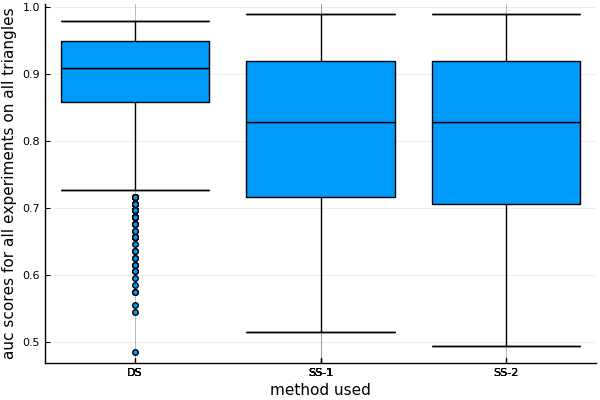

In [154]:
pyplot()
aucvals = hcat(AUC1,AUC2,AUC3)
aucvals = aucvals'[:]
boxplot(["DS","SS-1","SS-2"],aucvals,leg=false)
xlabel!("method used")
ylabel!("auc scores for all experiments on all triangles")

In [155]:
tao = 0.8
Atrain,Atest = split_train_test(A,tao);
ei,ej,ev = findnz(triu(Atrain))
@show length(ei)
n = size(A,1)
myalpha = 0.8
AUC1 = []
AUC2 = []
AUC3 = []
for i = 1:length(ei)

    v1 = ei[i]
    v2 = ej[i]
    xd,xs1,xs2 = double_seed(Atrain,v1,v2,myalpha)
    
    
    tris = unzip_triangles(collect(triangles(A,v1)))
    # tris2 = unzip_triangles(collect(triangles(A,v2)))
    # tris[1] is all = v1
    ek1 = tris[3][findall(tris[2].==v2)]
    ek2 = tris[2][findall(tris[3].==v2)]
    xref = spzeros(n)
    if !isempty(ek1)
        xref[ek1] .= 1
    end
    if !isempty(ek2)
        xref[ek2] .= 1
    end
    
    tpr,fpr,auc1 = calc_AUC_new(xref,xd); push!(AUC1,auc1);
    tpr,fpr,auc2 = calc_AUC_new(xref,xs1); push!(AUC2,auc2);
    tpr,fpr,auc3 = calc_AUC_new(xref,xs2); push!(AUC3,auc3);
    
end


length(ei) = 1557


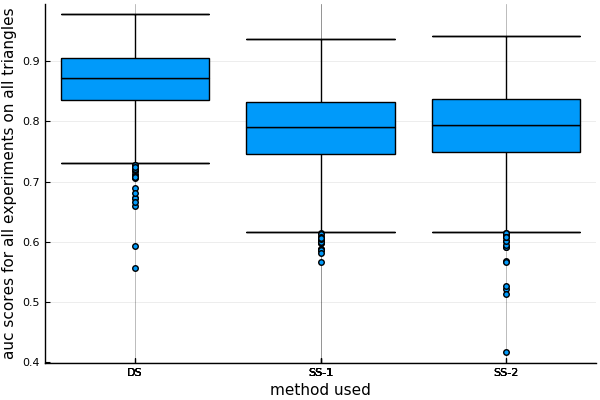

In [157]:
pyplot()
aucvals = hcat(AUC1,AUC2,AUC3)
aucvals = aucvals'[:]
boxplot(["DS","SS-1","SS-2"],aucvals,leg=false)
xlabel!("method used")
ylabel!("auc scores for all experiments on all triangles")

In [158]:
?triangles

search: triangles triangles_iterator mytriangles find_triangles



  * triangles(A) return an iterator for all the triangles in a graph A
  * triangles(A,i) return an iterator for all triangles in a graph A involving node i
  * triangles(A,S) return an iterator for all triangles in a graph A involving a node in S
  * triangles(A,S;symmetries=true) return an iterator of all triangles in A involving a node in S with symmetries    (i.e. a triangle (i,j,k) is counted 6 times)

## sample run:

```
using MatrixNetworks
A = load_matrix_network("clique-10");
mytriangles = triangles(A)
for tri in mytriangles
    triprint(tri)
end
z = collect(mytriangles)
ei,ej,ek = unzip_triangles(z)
```


In [160]:
mytriangles = triangles(A;symmetries = true)
z = collect(mytriangles)
size(z)

(58176,)

In [161]:
sum(Diagonal(A^3))

58176

In [215]:
tao = 0.8
Atrain,Atest = split_train_test(A,tao);
ei,ej,ev = findnz(triu(Atrain))
T = collapse_network(Atrain)
n = size(A,1)
myalpha = 0.8
AUC1 = []
AUC2 = []
AUC3 = []
AUC4 = []
for i = 1:length(ei)
    v1 = ei[i]
    v2 = ej[i]
    xd,xs1,xs2 = double_seed(Atrain,v1,v2,myalpha)
    
    v3 = n*(v2-1)+v1
    xc = seeded_pagerank(T,myalpha,v3)[n^2+1:end]
    
    tris = unzip_triangles(collect(triangles(A,v1)))
    # tris2 = unzip_triangles(collect(triangles(A,v2)))
    # tris[1] is all = v1
    ek1 = tris[3][findall(tris[2].==v2)]
    ek2 = tris[2][findall(tris[3].==v2)]
    xref = spzeros(n)
    if !isempty(ek1)
        xref[ek1] .= 1
    end
    if !isempty(ek2)
        xref[ek2] .= 1
    end
    
    tpr,fpr,auc1 = calc_AUC_new(xref,xd); push!(AUC1,auc1);
    tpr,fpr,auc2 = calc_AUC_new(xref,xs1); push!(AUC2,auc2);
    tpr,fpr,auc3 = calc_AUC_new(xref,xs2); push!(AUC3,auc3);
    tpr,fpr,auc4 = calc_AUC_new(xref,xc); push!(AUC4,auc4);
    
end

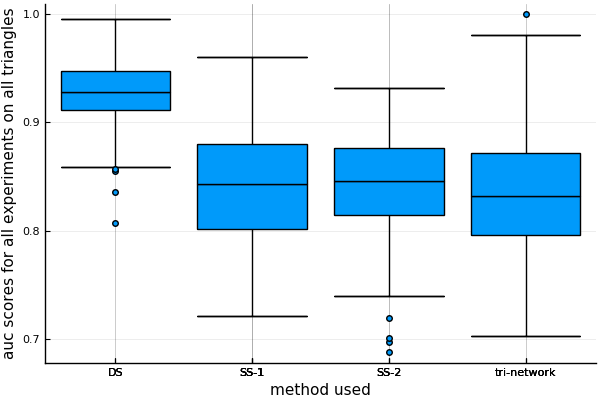

In [213]:
pyplot()
aucvals = hcat(AUC1,AUC2,AUC3,AUC4)
aucvals = aucvals'[:]
boxplot(["DS","SS-1","SS-2","tri-network"],aucvals,leg=false)
xlabel!("method used")
ylabel!("auc scores for all experiments on all triangles")